<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas:

## 1. coleta de dados
- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia

## 2. processar e tratar dados
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.

## 3. analisar e explorar dados
- [x] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [x] Unir DF's
- [x] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.
- [ ] atualizar os inputs com dados mais recentes



In [62]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

yfin.pdr_override()

In [63]:
# Bitcoin(BTC-USD)

#data inicial e final
start_date = '2020-01-01'
end_date = '2022-12-31'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [114]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [65]:
#verificando se tem algum valor nan ou null
print(df_bitcoin.isna().any())
print(df_bitcoin.info())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1095 non-null   float64
 1   High       1095 non-null   float64
 2   Low        1095 non-null   float64
 3   Close      1095 non-null   float64
 4   Adj Close  1095 non-null   float64
 5   Volume     1095 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.9 KB
None


In [66]:
'''
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

' \n  etapa 2\n  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv\n  no seguinte endereco\n  https://br.investing.com/currencies/usd-brl-historical-data\n\n'

In [67]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_TEST_20200101_20221231.csv')

df_dolar.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.12.2022,"5,2860","5,2681","5,3049","5,1895","122,63K","0,35%"
1,28.12.2022,"5,2676","5,2967","5,2967","5,2260","110,39K","-0,48%"
2,27.12.2022,"5,2928","5,2189","5,3028","5,1940","120,92K","1,42%"
3,26.12.2022,"5,2186","5,1669","5,2210","5,1545","69,65K","1,03%"
4,23.12.2022,"5,1652","5,1670","5,1789","5,1160","164,08K","-0,03%"


In [68]:
def rename_and_sort_columns(df):
  df = df.rename(columns={'Data': 'Date',
                          'Último': 'dolar_close',
                          'Abertura': 'dolar_open',
                          'Máxima': 'dolar_high',
                          'Mínima': 'dolar_low',
                          'Vol.' : 'dolar_volume',
                          'Var%': 'dolar_variation'})

  #convertando BR para US
  columns = ['dolar_close', 'dolar_open',
             'dolar_high', 'dolar_low']

  for column in columns:
    df[column] = df[column].apply(lambda x: x.replace(',', '.')).astype(np.float64)

  df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

  #alterando o index para Data
  df = df.set_index('Date')

  return df.sort_values('Date')

In [69]:
df_dolar = rename_and_sort_columns(df_dolar)
df_dolar.head()

,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,
2020-01-01,4.0195,4.0195,4.0195,4.0195,NaN,"0,00%"
2020-01-02,4.0263,4.0198,4.0412,4.0032,"31,67K","0,17%"
2020-01-03,4.0672,4.0253,4.0718,4.0253,"43,89K","1,02%"
2020-01-06,4.0618,4.0565,4.0743,4.0458,"31,86K","-0,13%"
2020-01-07,4.0679,4.0622,4.0924,4.0543,"36,55K","0,15%"


In [70]:
# visualizando dados vazios
df_dolar.isna().sum()

dolar_close         0
dolar_open          0
dolar_high          0
dolar_low           0
dolar_volume       21
dolar_variation     0
dtype: int64

In [71]:
#funcao para remover k
def remove_k(numero_k):
  return float(numero_k.replace(',', '.').replace('K', '').replace('k',''))

In [72]:
#funcao para add k
def add_k(numero):
  return f"{str(numero).replace('.', ',')}K"

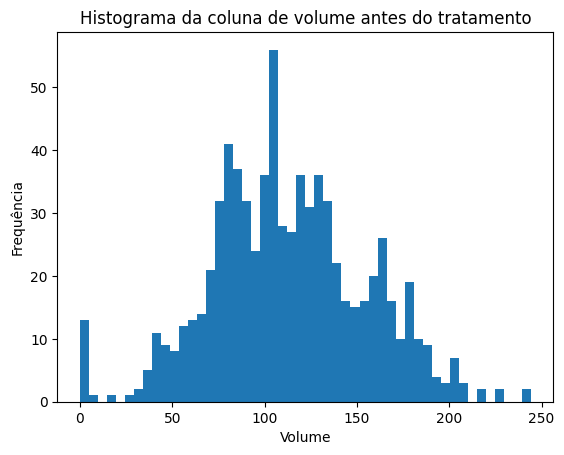

In [73]:
#plotando hist para analise de dados
dolar_volume = df_dolar['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [74]:
dolar_volume_sort = dolar_volume.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume_sort.describe())

count    761.000000
mean     112.980894
std       42.053591
min        0.000000
25%       84.540000
50%      110.070000
75%      139.030000
max      244.220000
Name: dolar_volume, dtype: float64


In [75]:
median_k = add_k(dolar_volume.median())

df_dolar['dolar_volume'].fillna(median_k, inplace=True)

In [76]:
print(df_dolar.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [116]:
print(df_bitcoin.isna().any())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [78]:
'''fim etapa 2 '''

'fim etapa 2 '

In [79]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

In [80]:
#plotando cnadlestick bitcoin
fig_bitcoin = go.Figure(data=[go.Candlestick(x=df_bitcoin.index.values,
                                             open=df_bitcoin['Open'],
                                             close=df_bitcoin['Close'],
                                             high=df_bitcoin['High'],
                                             low=df_bitcoin['Low'])])

fig_bitcoin.update_layout(
    title='Histórico de preços do Bitcoin',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_bitcoin.show()

In [81]:
#plotando cnadlestick dolar
fig_dolar = go.Figure(data=[go.Candlestick(x=df_dolar.index.values,
                                             open=df_dolar['dolar_open'],
                                             close=df_dolar['dolar_close'],
                                             high=df_dolar['dolar_high'],
                                             low=df_dolar['dolar_low'])])

fig_dolar.update_layout(
    title='Histórico de preços do Dolar',
    yaxis_title='Preço (USD)',
    xaxis_title='Data')

fig_dolar.show()

In [82]:
''' fim etapa 4 '''

' fim etapa 4 '

In [83]:
'''
  etapa 5
  unir DF's
'''



"\n  etapa 5\n  unir DF's\n"

In [84]:
df_bitcoin_dolar = pd.merge(df_bitcoin, df_dolar, on='Date')

In [85]:
df_bitcoin_dolar.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,4.0195,4.0195,4.0195,4.0195,"110,07K","0,00%"
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,4.0263,4.0198,4.0412,4.0032,"31,67K","0,17%"
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,4.0672,4.0253,4.0718,4.0253,"43,89K","1,02%"
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,4.0618,4.0565,4.0743,4.0458,"31,86K","-0,13%"
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327,4.0679,4.0622,4.0924,4.0543,"36,55K","0,15%"


In [86]:
#grafico de series temporais, com o valor do preço do bitcoin em relacao ao dolar
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['Close'], mode='lines', name='Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['dolar_close'], mode='lines', name='Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()

In [87]:
# cálculo de estatísticas descritivas para os preços do bitcoin e do dólar
print('Estatísticas Descritivas - Bitcoin:')
print(df_bitcoin_dolar['Close'].describe())

print('\nEstatísticas Descritivas - Dólar:')
print(df_bitcoin_dolar['dolar_close'].describe())

Estatísticas Descritivas - Bitcoin:
count      782.000000
mean     28915.413268
std      17114.020075
min       4970.788086
25%      11621.309570
50%      23562.691406
75%      43052.125000
max      67566.828125
Name: Close, dtype: float64

Estatísticas Descritivas - Dólar:
count    782.000000
mean       5.237944
std        0.344189
min        4.019500
25%        5.118925
50%        5.274050
75%        5.456500
max        5.885600
Name: dolar_close, dtype: float64


In [88]:
# correlação entre os preços do bitcoin e do dólar
# Correlação positiva: Significa que os preços do dólar e do bitcoin tendem a subir ou cair juntos. Se o dólar sobe, o bitcoin também pode subir, e vice-versa.
# Correlação negativa: Significa que os preços do dólar e do bitcoin tendem a se mover em direções opostas. Se o dólar sobe, o bitcoin pode cair, e vice-versa.
# Correlação neutra: Significa que não há uma relação clara entre os movimentos de preço do dólar e do bitcoin. Eles podem se mover de forma independente, sem uma relação significativa.
correlation = df_bitcoin_dolar['Close'].corr(df_bitcoin_dolar['dolar_close'])
print('Correlação entre os preços do Bitcoin e do Dólar:', correlation)


Correlação entre os preços do Bitcoin e do Dólar: 0.31068746433469274


In [89]:
# criando indicadores

# func médias móveis para identificar tendências

def identify_trends(df):
  # média móvel simples de 30 dias para o preço do bitcoin
  df['sma30_bitcoin'] = df['Close'].rolling(window=30).mean()

  # média móvel simples de 30 dias para o preço do dólar
  df['sma30_dolar'] = df['dolar_close'].rolling(window=30).mean()


  # calcular a diferença entre o preço de fechamento do bitcoin e do dólar
  df['diff_bitcoin_dolar'] = df['Close'] - df['dolar_close']

  # calcular a diferença percentual entre o preço de fechamento do bitcoin e do dólar
  df['diff_perc_bitcoin_dolar'] = (df['Close'] / df['dolar_close']) - 1
  return

identify_trends(df_bitcoin_dolar)

In [90]:
# verificando se nao tem nenhum dado vazio
df_bitcoin_dolar.isna().any()
df_bitcoin_dolar.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation,sma30_bitcoin,sma30_dolar,diff_bitcoin_dolar,diff_perc_bitcoin_dolar
Date,,,,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,4.0195,4.0195,4.0195,4.0195,"110,07K","0,00%",NaN,NaN,7196.154816,1790.310938
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,4.0263,4.0198,4.0412,4.0032,"31,67K","0,17%",NaN,NaN,6981.443915,1733.960190
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,4.0672,4.0253,4.0718,4.0253,"43,89K","1,02%",NaN,NaN,7340.817077,1804.882248
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,4.0618,4.0565,4.0743,4.0458,"31,86K","-0,13%",NaN,NaN,7765.157438,1911.752779
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327,4.0679,4.0622,4.0924,4.0543,"36,55K","0,15%",NaN,NaN,8159.624483,2005.856703


In [91]:
#como tem valor nan, vou tratar usando a interpolacao
#repetindo o primeiro valor valido para as linhas com nan
def first_valid(df):
  df['sma30_bitcoin'] = df['sma30_bitcoin'].interpolate(limit_direction='backward')

  df['sma30_dolar'] = df['sma30_dolar'].interpolate(limit_direction='backward')
  return

# first_valid(df_bitcoin_dolar)
df_bitcoin_dolar = df_bitcoin_dolar.dropna()

In [92]:
# Plot das médias móveis e dos preços originais
lines = [go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_bitcoin'], mode='lines', name='Preço Bitcoin'),
         go.Scatter(x=df_bitcoin_dolar.index, y=df_bitcoin_dolar['sma30_dolar'], mode='lines', name='Preço Dolar')]

layout = go.Layout(
    title='Preço do Bitcoin em relação ao Dólar',
    yaxis_title='Preço',
    xaxis_title='Data'
)

fig = go.Figure(data=lines, layout=layout)
fig.show()

In [93]:
#modelo de aprendizado

#separa os dados em conjuntos de treinamento e teste

X = df_bitcoin_dolar[['sma30_bitcoin', 'sma30_dolar', 'diff_bitcoin_dolar', 'diff_perc_bitcoin_dolar']] # variáveis independentes
y = df_bitcoin_dolar['Close'] # variável dependente (preço do bitcoin)

#random_state eh apenas uma seed que sera usado pela a funcao de treinamento
#do sckit-learning para gerar a divisao dos dados em conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo usando regressao linear

In [94]:
# treinar o modelo de regressão linear
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_lr = model_linear_regression.predict(X_train)
y_pred_test_lr = model_linear_regression.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) LinearRegression
r2_linear_regression = r2_score(y_test, y_pred_test_lr)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_lr)
print('Erro médio quadrático (conjunto de teste):', mse_test_lr)
print("R2: ", r2_linear_regression)

Erro médio quadrático (conjunto de treinamento): 0.011071353149582292
Erro médio quadrático (conjunto de teste): 0.016121492969810927
R2:  0.999999999940222


modelo usando Random Forest


In [95]:
# criando o modelo de Random Forest
model_random_forest_regressor = RandomForestRegressor(n_estimators=5, random_state=42)
model_random_forest_regressor.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_rfr = model_random_forest_regressor.predict(X_train)
y_pred_test_rfr = model_random_forest_regressor.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(y_test, y_pred_test_rfr)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) RandomForestRegressor
r2_rfr = r2_score(y_test, y_pred_test_rfr)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_rfr)
print('Erro médio quadrático (conjunto de teste):', mse_test_rfr)
print("R2: ", r2_rfr)

Erro médio quadrático (conjunto de treinamento): 9906.142737553424
Erro médio quadrático (conjunto de teste): 27334.062098157992
R2:  0.9998986461966711


In [96]:
# # Importar as bibliotecas necessárias
# from sklearn.tree import export_graphviz
# import graphviz

# # Extrair uma árvore de decisão do modelo de Random Forest
# tree = model_random_forest_regressor.estimators_[0]  # Substitua "modelo_rf" pelo nome do seu modelo de Random Forest

# # Exportar a árvore de decisão para um arquivo .dot
# dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)

# graph = graphviz.Source(dot_data)

# # Visualize a árvore em formato de imagem (requer que a biblioteca graphviz esteja instalada)
# graph.render('arvore', view=True)

In [97]:
# criando o modelo de regressao neural
#ao usar menos neuronios e/ou mais camadas o coeficiente(R2) pendia para valores negativos
layer = (25, 25, 25)
model_random_mlp_regressor = MLPRegressor(hidden_layer_sizes=layer, activation='relu', solver='adam', random_state=42)
model_random_mlp_regressor.fit(X_train, y_train)

# fazer treinamento do preço do bitcoin
y_pred_train_mlp_regressor = model_random_mlp_regressor.predict(X_train)
y_pred_test_mlp_regressor = model_random_mlp_regressor.predict(X_test)

# avaliar o desempenho do modelo usando o erro médio quadrático
mse_train_mlp_regressor = mean_squared_error(y_train, y_pred_train_mlp_regressor)
mse_test_mlp_regressor = mean_squared_error(y_test, y_pred_test_mlp_regressor)

#calculando coeficiente de determinação (R2 - quanto mais perto de 1 melhor) regressao neural
r2_mlp_regressor = r2_score(y_test, y_pred_test_mlp_regressor)

print('Erro médio quadrático (conjunto de treinamento):', mse_train_mlp_regressor)
print('Erro médio quadrático (conjunto de teste):', mse_test_mlp_regressor)
print("R2: ", r2_mlp_regressor)

Erro médio quadrático (conjunto de treinamento): 5039.228922414208
Erro médio quadrático (conjunto de teste): 1060.7683220075162
R2:  0.9999960667059473


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Com base nos valores do Mean Squared Error (MSE) e do coeficiente de determinação (R2) que você forneceu, parece que o modelo de Regressão Linear tem um desempenho significativamente melhor em relação ao Random Forest para o seu conjunto de dados.

O MSE é uma métrica que avalia a média dos erros quadráticos do modelo, sendo que um valor menor indica melhor ajuste aos dados. No seu caso, o MSE da Regressão Linear é extremamente baixo (0.015209712200605399), o que indica que esse modelo apresenta uma menor dispersão dos erros em relação aos dados observados.

Além disso, o coeficiente de determinação (R2) é uma métrica que varia de 0 a 1, sendo que um valor próximo de 1 indica que o modelo explica uma grande proporção da variabilidade dos dados. No seu caso, o R2 da Regressão Linear é muito próximo de 1 (0.9999999999327274), o que indica que esse modelo explica quase toda a variação dos dados observados.

Portanto, com base nessas métricas, a Regressão Linear parece ser a melhor opção entre os dois modelos para o seu problema específico. No entanto, é importante considerar outros fatores, como a adequação do modelo aos objetivos e requisitos do seu problema, a interpretabilidade do modelo, a escalabilidade, o tempo de treinamento e inferência, e outros aspectos relevantes antes de tomar uma decisão final sobre qual modelo de machine learning utilizar.

O coeficiente de determinação (R2) é uma métrica que varia de 0 a 1, e é usada para avaliar o quão bem um modelo de regressão se ajusta aos dados observados. No entanto, em alguns casos, o R2 pode assumir um valor negativo.

Um R2 negativo indica que o modelo de regressão não está ajustando bem aos dados e pode ser pior do que um simples modelo de referência, como a média dos valores observados. Em outras palavras, o modelo está prevendo os valores de forma tão inadequada que seu desempenho é pior do que se simplesmente usássemos a média dos valores observados como uma previsão.

R2 negativo pode ocorrer quando o modelo está fazendo previsões que são muito piores do que a média dos valores observados, indicando uma má qualidade do ajuste do modelo aos dados. É importante considerar as causas potenciais de um R2 negativo, como dados ruidosos, subamostragem inadequada, variáveis inadequadas ou inadequação do próprio modelo de regressão, e reavaliar a escolha do modelo e a qualidade dos dados em tais situações.

In [98]:
'''FAZENDO A PREVISAO'''

'FAZENDO A PREVISAO'

In [99]:
'''coletando o df do bitcoin'''

#data inicial e final
start_date = '2023-01-01'
end_date = '2023-05-02'

# coletando os dataframe
df_bitcoin_pred = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [100]:
'''coletando o dolar'''
df_dolar_pred = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_PRED_20230101_20230501.csv')

df_dolar_pred = rename_and_sort_columns(df_dolar_pred)
print(df_dolar_pred.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume        True
dolar_variation    False
dtype: bool


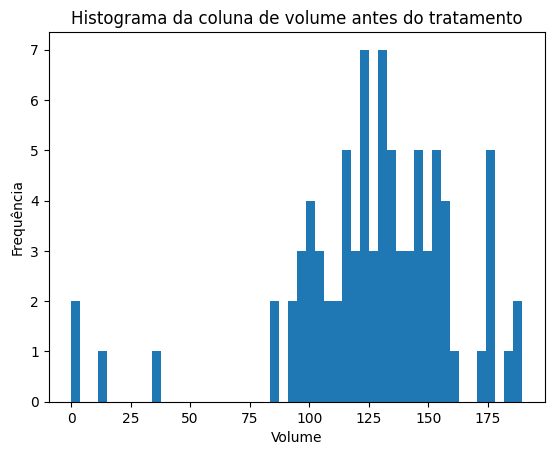

In [101]:
dolar_volume_pred = df_dolar_pred['dolar_volume'].dropna().apply(remove_k)
plt.hist(dolar_volume_pred, bins=50)
plt.title('Histograma da coluna de volume antes do tratamento')
plt.xlabel('Volume')
plt.ylabel('Frequência')
plt.show()

In [102]:
dolar_volume_pred = dolar_volume_pred.sort_values()

# Imprimindo as medidas estatísticas
print(dolar_volume_pred.describe())

count     85.000000
mean     127.108706
std       35.704041
min        0.060000
25%      113.480000
50%      130.120000
75%      147.800000
max      189.340000
Name: dolar_volume, dtype: float64


In [103]:
median_k = add_k(dolar_volume_pred.median())

df_dolar_pred['dolar_volume'].fillna(median_k, inplace=True)

print(df_dolar_pred.isna().any())

dolar_close        False
dolar_open         False
dolar_high         False
dolar_low          False
dolar_volume       False
dolar_variation    False
dtype: bool


In [104]:
'''unindo os df pred'''

'unindo os df pred'

In [105]:
df_bitcoin_dolar_pred = pd.merge(df_bitcoin_pred, df_dolar_pred, on='Date')
df_bitcoin_dolar_pred.head()

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,5.3633,5.2865,5.3671,5.2861,"84,04K","1,46%"
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,5.4797,5.3638,5.4802,5.3396,"188,23K","2,17%"
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,5.4312,5.4799,5.4799,5.4248,"175,09K","-0,89%"
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,5.3509,5.4315,5.4315,5.3478,"148,32K","-1,48%"
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913,5.2254,5.3514,5.3697,5.2186,"154,80K","-2,35%"


In [106]:
identify_trends(df_bitcoin_dolar_pred)
print(df_bitcoin_dolar_pred.isna().any())

Open                       False
High                       False
Low                        False
Close                      False
Adj Close                  False
Volume                     False
dolar_close                False
dolar_open                 False
dolar_high                 False
dolar_low                  False
dolar_volume               False
dolar_variation            False
sma30_bitcoin               True
sma30_dolar                 True
diff_bitcoin_dolar         False
diff_perc_bitcoin_dolar    False
dtype: bool


In [107]:
#first_valid(df_bitcoin_dolar_pred)
df_bitcoin_dolar_pred = df_bitcoin_dolar_pred.dropna()

In [108]:
''' usando o modelo de aprendizado'''

' usando o modelo de aprendizado'

In [109]:
X_pred = df_bitcoin_dolar_pred[['sma30_bitcoin', 'sma30_dolar', 'diff_bitcoin_dolar', 'diff_perc_bitcoin_dolar']]
Y_pred = df_bitcoin_dolar_pred['Close']

In [110]:
future_pred = model_linear_regression.predict(X_pred)

In [111]:
# future_indices = list(range(len(X) + 1, len(X) + 1 + len(X_pred)))

# # Create trace for actual Bitcoin values
# trace_actual = go.Scatter(
#     x=list(range(len(X))),
#     y=y,
#     mode='lines',
#     name='Actual Values'
# )

# # Create trace for future predictions
# trace_predictions = go.Scatter(
#     x=future_indices,
#     y=future_pred,
#     mode='lines',
#     name='Future Predictions'
# )

# # Create data array for the plot
# data = [trace_actual, trace_predictions]

# # Create layout for the plot
# layout = go.Layout(
#     title='Future Predictions of Bitcoin Value',
#     xaxis=dict(title='Period'),
#     yaxis=dict(title='Bitcoin Value')
# )

# # Create figure object
# fig = go.Figure(data=data, layout=layout)

# # Show the plot
# fig.show()

# df_bitcoin_dolar_pred.to_csv('bitcon.csv', index=True)
# myDf = pd.DataFrame(future_pred)
# myDf.to_csv('futu.csv', index=True)

In [112]:
# Datas futuras
from datetime import datetime, timedelta
last_date = pd.to_datetime(X_pred.index[-1])  # Última data do seu conjunto de dados X
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=180, freq='D')  # Datas futuras para 6 períodos (dias) com frequência diária

# Previsões futuras do modelo
#future_predictions = model.predict(X_new)  # Substitua X_new pelas suas novas amostras de entrada para previsão

# Criar trace para previsões futuras
trace_future_predictions = go.Scatter(
    x=future_dates,
    y=future_pred,
    mode='lines',
    name='Future Predictions'
)

# Criar trace para dados históricos
trace_historical_data = go.Scatter(
    x=X_pred.index,
    y=Y_pred,
    mode='lines',
    name='Historical Data'
)

# Data array para o gráfico
data = [trace_future_predictions]

# Layout para o gráfico
layout = go.Layout(
    title='Bitcoin Future Predictions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Bitcoin Value')
)

# Criar figura
fig = go.Figure(data=data, layout=layout)

# Exibir o gráfico
fig.show()
print(X_pred.index[-1])

2023-05-01 00:00:00


In [113]:
data=[go.Candlestick(x=future_dates)]

fig_future_bitcoin_dolar = go.Figure(data=[])